**Dataset para modelos supervisados**
**Elaborado por:** Anderson Guevara, Darli Mina, Leidy Muñoz

Importar las librerías

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import ConfusionMatrixDisplay

In [130]:
# Cargar dataset

file_id = "17N_wmBHa8yPtV1ltXf-QOdnbySdpakQh"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
#Limpiar datos

# Eliminar columnas irrelevantes
df.drop(["customerID"], axis=1, inplace=True)

# Renombrar las columnas
df.rename({
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'MonthlyCharges': 'Cargos_Mensuales',
    'TotalCharges': 'Cargos_Totales',
    'Churn': 'Churn', # Mantenemos el mismo nombre para la conversión binaria
}, axis=1, inplace=True)

# Convertir 'Cargos_Totales' a numérico y eliminar filas vacías.
df["Cargos_Totales"] = pd.to_numeric(df["Cargos_Totales"], errors='coerce')
df.dropna(inplace=True)

# Conversión de 'Churn' a binario
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


# Exploración del dataset
print("Dimension del dataset: ", df.shape)
print("Columnas: ", df.columns)
df.head()

Dimension del dataset:  (7032, 20)
Columnas:  Index(['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Antiguedad',
       'Servicio_Telefonico', 'Lineas_Multiples', 'Servicio_Internet',
       'Seguridad_Online', 'Backup_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Contrato',
       'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Churn'],
      dtype='object')


,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genero                   7032 non-null   object 
 1   Adulto_Mayor             7032 non-null   int64  
 2   Pareja                   7032 non-null   object 
 3   Dependientes             7032 non-null   object 
 4   Antiguedad               7032 non-null   int64  
 5   Servicio_Telefonico      7032 non-null   object 
 6   Lineas_Multiples         7032 non-null   object 
 7   Servicio_Internet        7032 non-null   object 
 8   Seguridad_Online         7032 non-null   object 
 9   Backup_Online            7032 non-null   object 
 10  Proteccion_Dispositivo   7032 non-null   object 
 11  Soporte_Tecnico          7032 non-null   object 
 12  TV_Streaming             7032 non-null   object 
 13  Peliculas_Streaming      7032 non-null   object 
 14  Contrato                 7032

# **Histogramas**

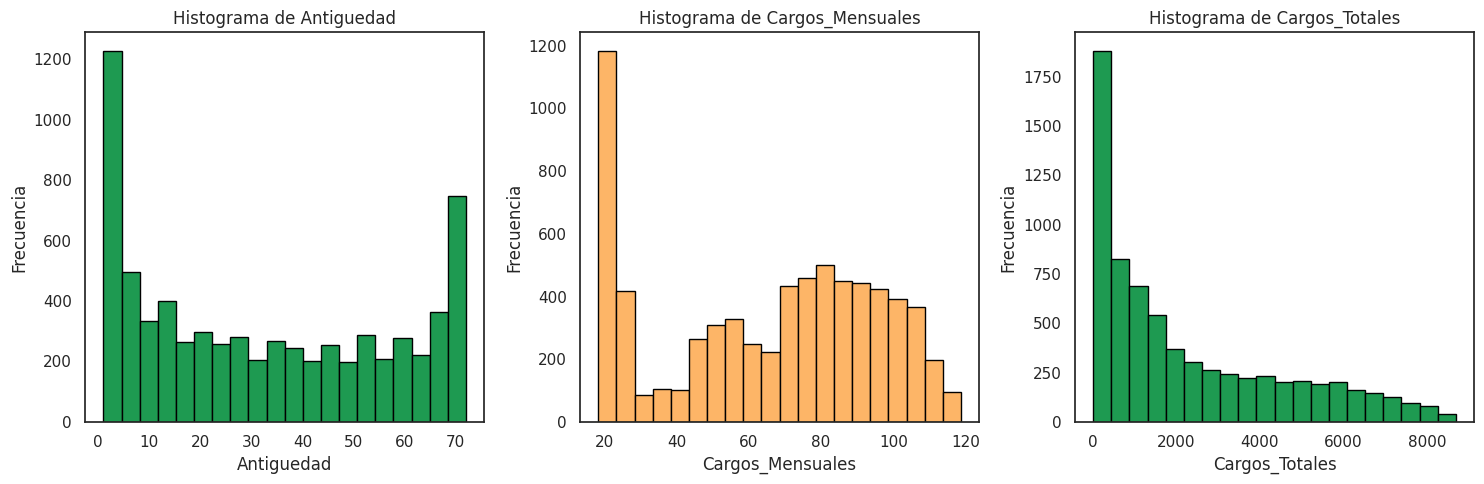

In [133]:

# Variables numéricas
variables = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales']

# Colores personalizados (uno por gráfico)
colores = ['#1E9A51', '#FDB567', '#1E9A51']  # Puedes cambiar el orden si deseas

plt.figure(figsize=(15, 5))

for i, atr in enumerate(variables):
    plt.subplot(1, 3, i+1)
    plt.hist(df[atr], bins=20, color=colores[i], edgecolor='black')
    plt.title(f'Histograma de {atr}')
    plt.xlabel(atr)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Análisis Bivariado**

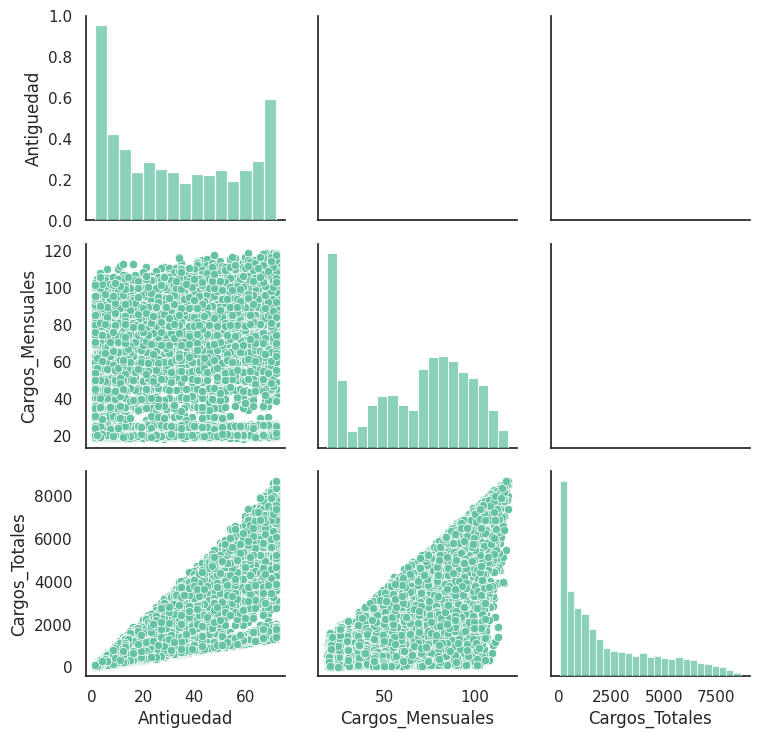

In [134]:

# analisis de relaciones de forma empirica de correlación de datos

sns.set(style='white')
sns.set_palette('Set2')

columnas_seleccionadas = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales']
df_filtrado = df[columnas_seleccionadas]

g = sns.PairGrid(data=df_filtrado,diag_sharey=False, corner=False)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

# **HEAT MAP**

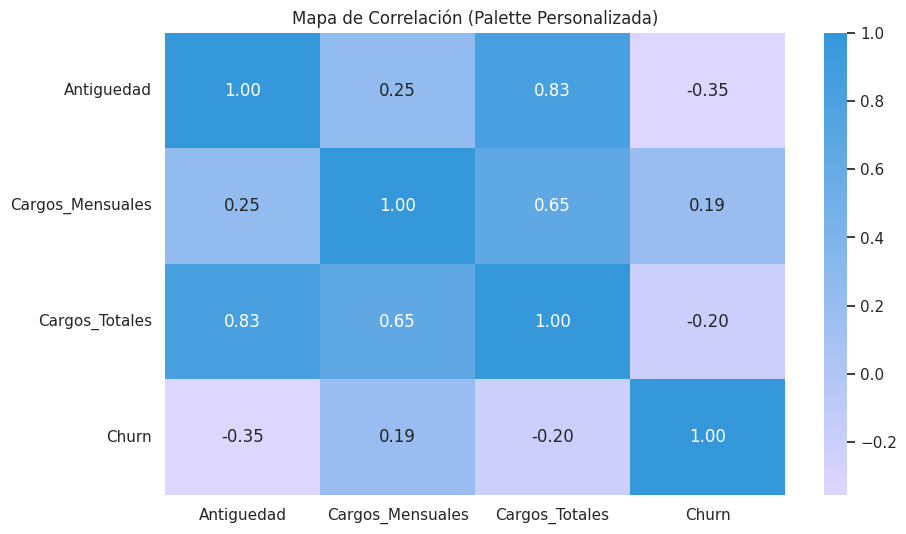

In [135]:

# Crear un colormap personalizado usando tus colores
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap",
    [ "#DDD6FF","#3498DB"]  # Verde → Amarillo
)

# Conversión y selección de variables
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce').fillna(0)

cols_numericas = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Churn']

# Graficar heatmap con tu colormap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[cols_numericas].corr(),
    annot=True,
    cmap=custom_cmap,
    fmt=".2f"
)
plt.title("Mapa de Correlación (Palette Personalizada)")
plt.show()


# **Correlación de abandono**

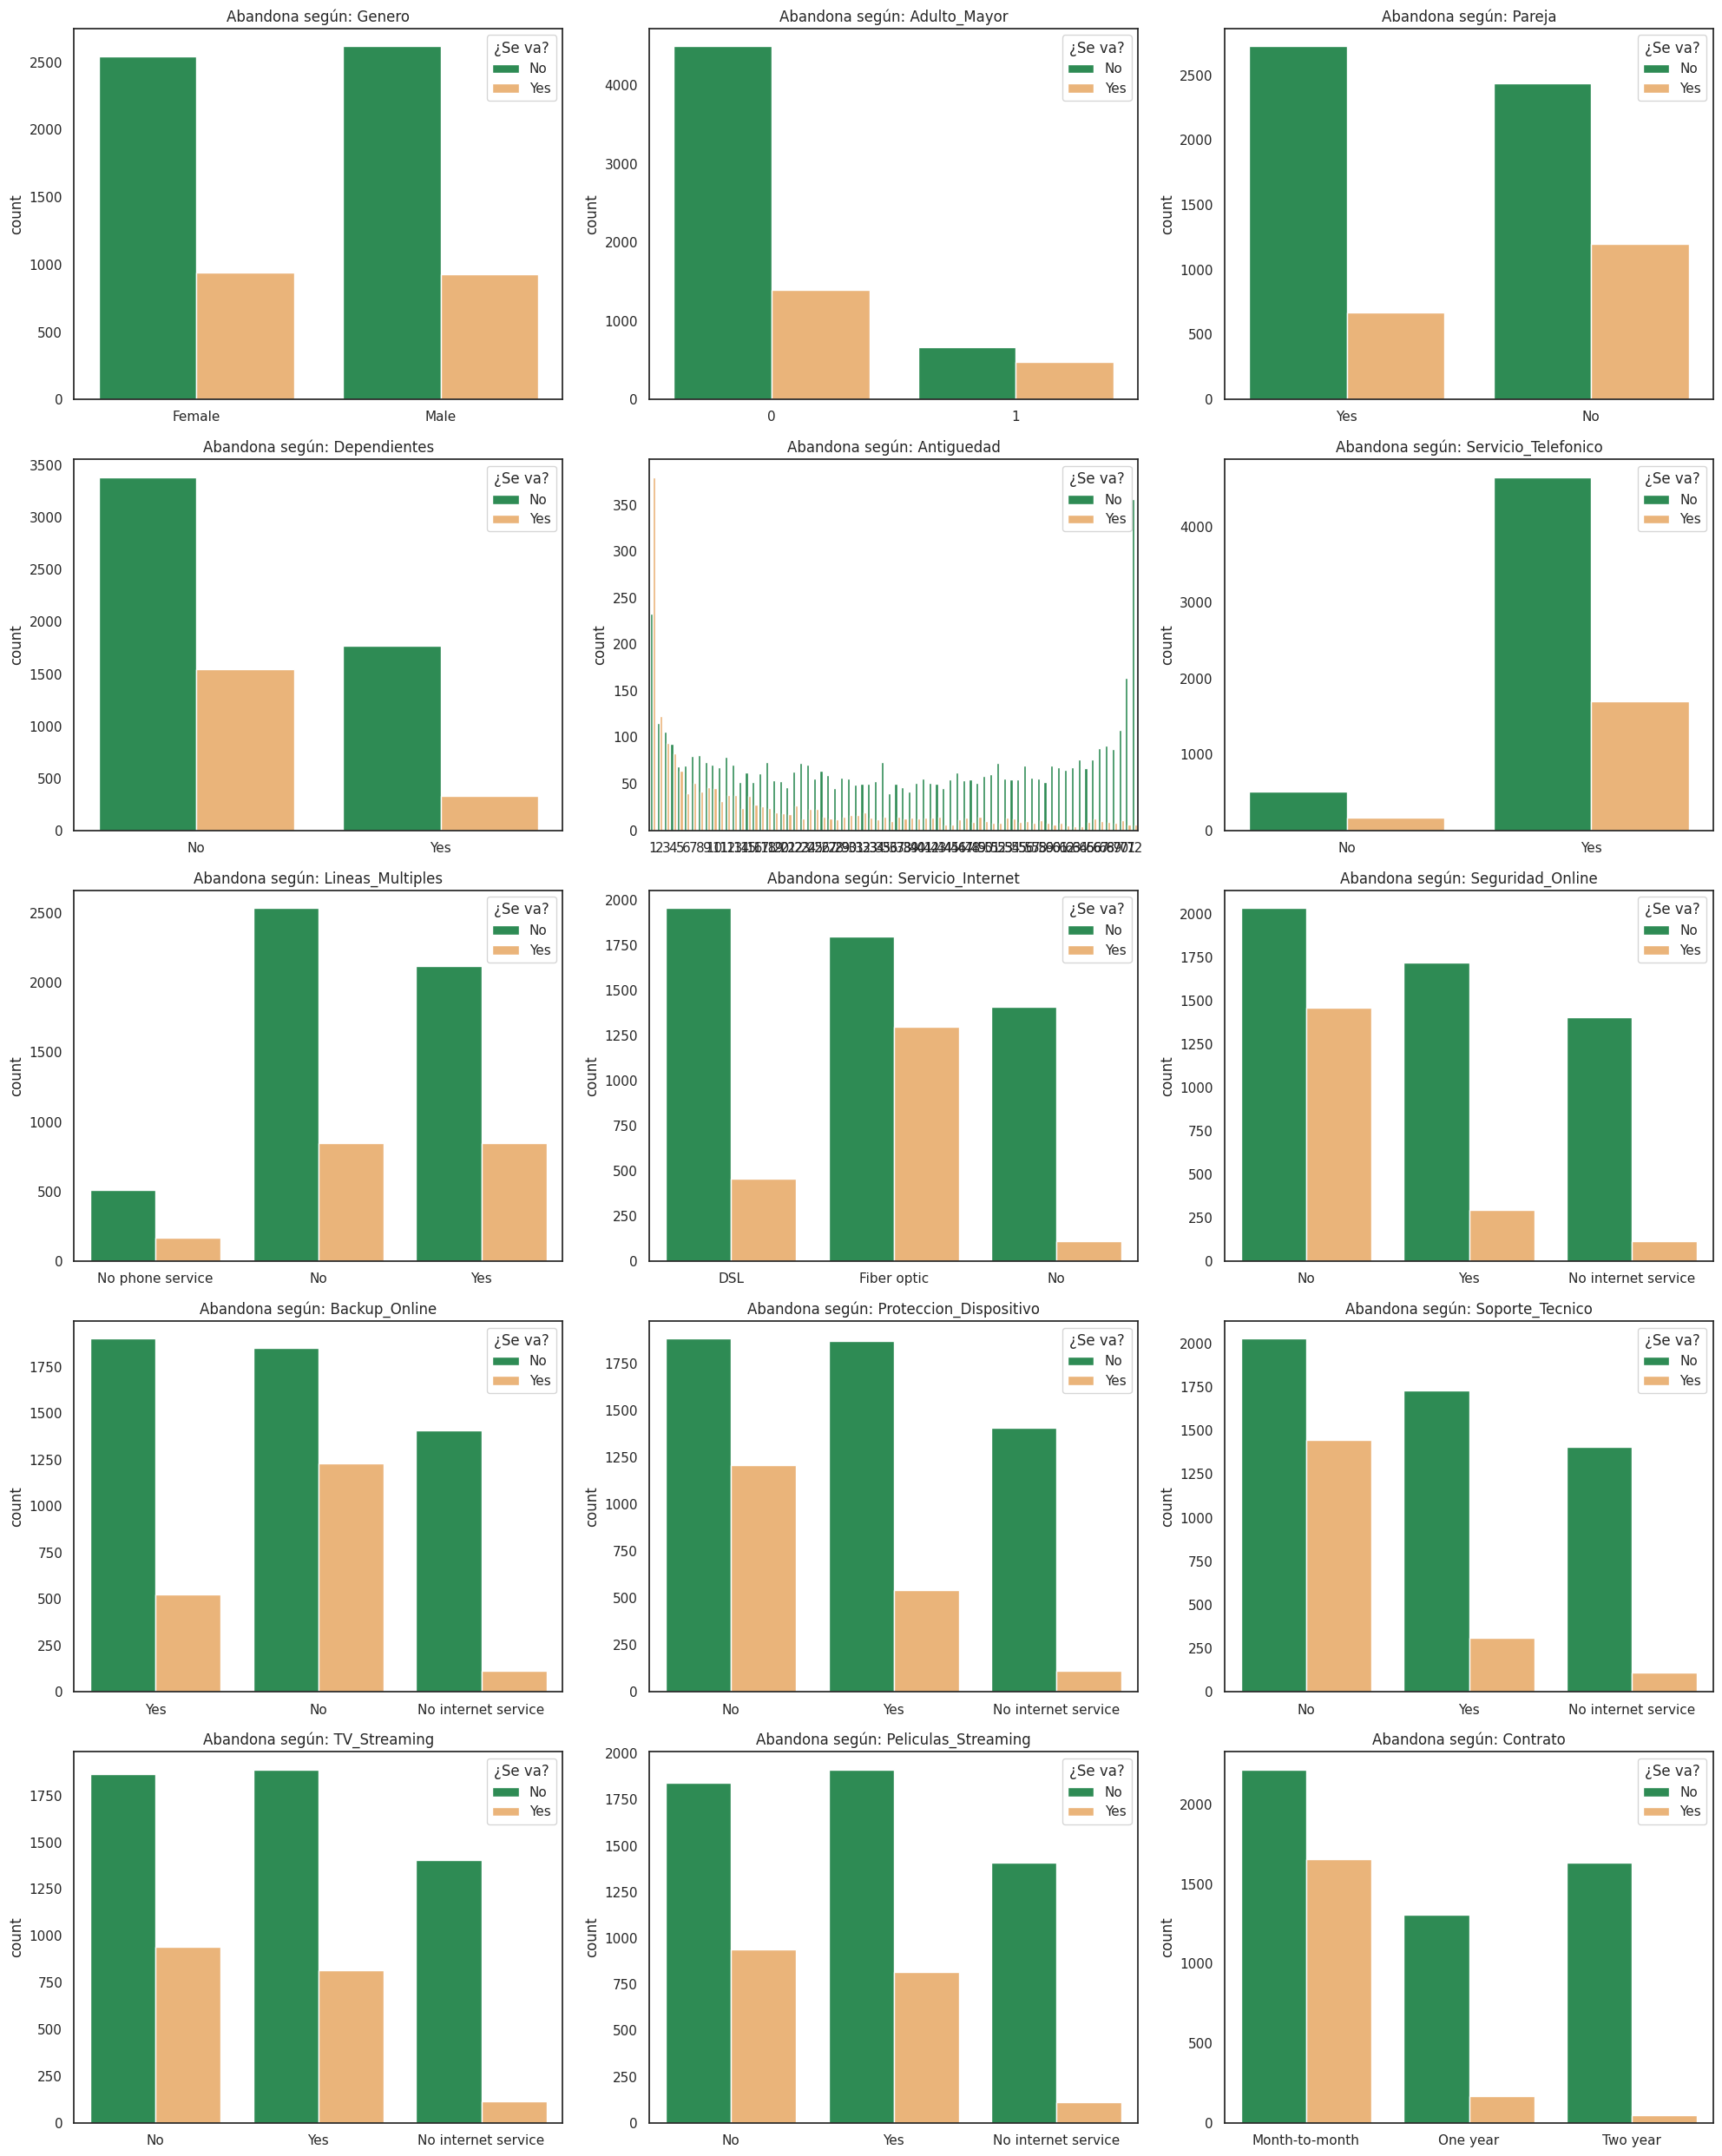

In [136]:

# 1. Definimos las variables categóricas que queremos analizar
# (Excluimos las numéricas como Antiguedad y Cargos)

#Convierto churn a texto  temporal para el grafico
df["Churn"] = df["Churn"].map({1: "Yes", 0: "No"})

cols_categoricas = [
    'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes',
    'Antiguedad', 'Servicio_Telefonico', 'Lineas_Multiples',
    'Servicio_Internet', 'Seguridad_Online', 'Backup_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming',
    'Peliculas_Streaming', 'Contrato', 'Facturacion_Electronica', 'Metodo_Pago',
    'Cargos_Mensuales', 'Cargos_Totales'
]

palette_custom = {
    "No": "#1E9A51",
    "Yes": "#FDB567"
}

# 2. Crear figura
fig, axes = plt.subplots(5, 3, figsize=(20, 25))
axes = axes.flatten()

# 3. Dibujar cada gráfico categórico
for i, col in enumerate(cols_categoricas):
    if i < len(axes):
        sns.countplot(
            x=col,
            hue='Churn',
            data=df,
            ax=axes[i],
            palette=palette_custom
        )

        axes[i].set_title(f'Abandona según: {col}')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=0)

        axes[i].legend(
            title='¿Se va?',
            loc='upper right',
            ncol=1,
            frameon=True
        )

plt.tight_layout()
plt.show()


#Convierto churn a binario nuevamente.
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [137]:
# Relación entre Facturacion_Electronica y Abandono
relacion_contrato1 = pd.crosstab(df['Facturacion_Electronica'], df['Churn'], normalize='index') * 100
print(relacion_contrato1)

# Relación entre Metodo_Pago y Abandono
relacion_contrato2 = pd.crosstab(df['Metodo_Pago'], df['Churn'], normalize='index') * 100

print("\n________________________________________________")
print(relacion_contrato2)



Churn                            0          1
Facturacion_Electronica                      
No                       83.624302  16.375698
Yes                      66.410749  33.589251

 __________________
Churn                              0          1
Metodo_Pago                                    
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


# **Análisis Exploratorio de los Datos - Limpieza - Preparación**

In [138]:
## Limpieza

#copia (profunda) del dataframe original antes de modificarlo.
df_clean = df.copy()

In [139]:
#Usar la función dataframe.duplicated() para determinar si hay algún registro duplicado en el dataframe.
df_clean.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [140]:
#se eliminan registros duplicados
df_clean = df_clean.drop_duplicates()

# Validar si hay duplicados
df_clean.duplicated().sum()


np.int64(0)

,0
Adulto_Mayor,"Axes(0.125,0.747241;0.110714x0.132759)"
Antiguedad,"Axes(0.257857,0.747241;0.110714x0.132759)"
Cargos_Mensuales,"Axes(0.390714,0.747241;0.110714x0.132759)"
Cargos_Totales,"Axes(0.523571,0.747241;0.110714x0.132759)"
Churn,"Axes(0.656429,0.747241;0.110714x0.132759)"


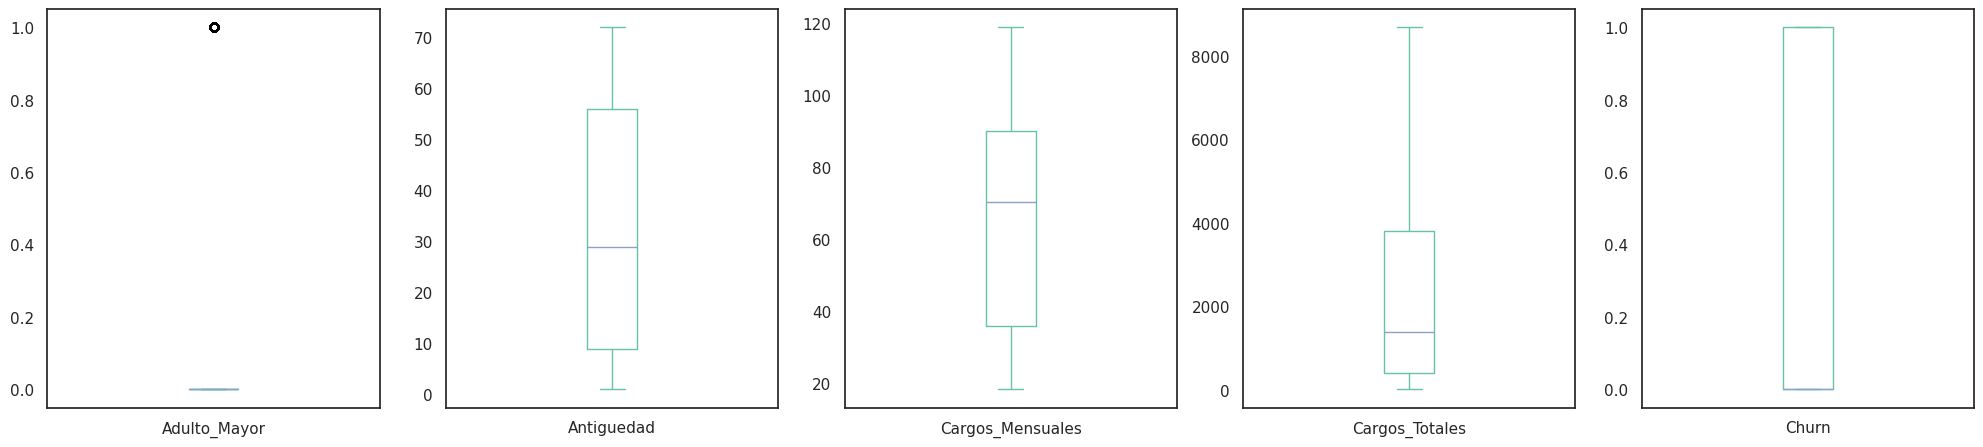

In [141]:
##Encontrar outliers  - Datos atipicos
df_clean.plot(kind='box', subplots=True, figsize=(30,30), layout=(5,6))


In [142]:
# Después de realizar operaciones que modifiquen el dataframe se debe organizar nuevamente el índice.
df_clean = df_clean.reset_index(drop=True)

#Se imprime el final del dataset
df_clean.tail()

,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Churn
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7009,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


#**PREPARACIÓN**

In [144]:
#variables predictoras y target

# Aplicar las conversiones de features a numéricos
df_clean["Genero"] = df_clean["Genero"].map({"Male": 1, "Female": 0})
df_clean["Pareja"] = df_clean["Pareja"].map({"Yes": 1, "No": 0})
df_clean["Dependientes"] = df_clean["Dependientes"].map({"Yes": 1, "No": 0})
df_clean["Servicio_Telefonico"] = df_clean["Servicio_Telefonico"].map({"Yes": 1, "No": 0})
df_clean["Lineas_Multiples"] = df_clean["Lineas_Multiples"].map({"Yes": 2, "No": 1, "No phone service": 0})
df_clean["Servicio_Internet"] = df_clean["Servicio_Internet"].map({"DSL": 2, "Fiber optic": 1, "No": 0})
df_clean["Seguridad_Online"] = df_clean["Seguridad_Online"].map({"Yes": 2, "No": 1, "No internet service": 0})
df_clean["Backup_Online"] = df_clean["Backup_Online"].map({"Yes": 2, "No": 1, "No internet service": 0})
df_clean["Proteccion_Dispositivo"] = df_clean["Proteccion_Dispositivo"].map({"Yes": 2, "No": 1, "No internet service": 0})
df_clean["Soporte_Tecnico"] = df_clean["Soporte_Tecnico"].map({"Yes": 2, "No": 1, "No internet service": 0})
df_clean["Contrato"] = df_clean["Contrato"].map({"Two year": 2, "One year": 1, "Month-to-month": 0})

# Definir las variables predictoras
predictores = [
'Cargos_Mensuales',
'Genero',
'Adulto_Mayor',
'Pareja',
'Dependientes',
'Antiguedad',
'Servicio_Telefonico',
'Lineas_Multiples',
'Servicio_Internet',
'Seguridad_Online',
'Backup_Online',
'Proteccion_Dispositivo',
'Soporte_Tecnico',
'Contrato'
]

#Se asignan la variable [predictores] a X
X = df_clean[predictores].values

# y siempre sera Churn
y = df_clean["Churn"]

print(y.shape)
print(X.shape)

(7010,)
(7010, 14)


In [145]:
#Separar datos en train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (5608, 14)
Shape of X_test:  (1402, 14)
Shape of y_train:  (5608,)
Shape of y_test (1402,)


In [146]:
#Normalizar variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **REGRESIÓN LOGÍSTICA**

In [147]:
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:,1]

In [149]:
#Métricas comparatias
print("\nKNN Resultados: ")
print(classification_report(y_test, knn_pred))



KNN Resultados: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1031
           1       0.61      0.52      0.56       371

    accuracy                           0.78      1402
   macro avg       0.72      0.70      0.71      1402
weighted avg       0.78      0.78      0.78      1402



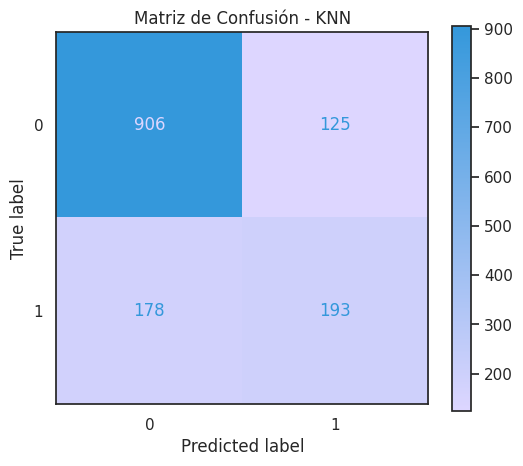

In [154]:

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap_cm",
    ["#DDD6FF","#3498DB"]
)

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 5))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred))
disp.plot(ax=ax, cmap=custom_cmap, colorbar=True)

plt.title("Matriz de Confusión - KNN")
plt.show()


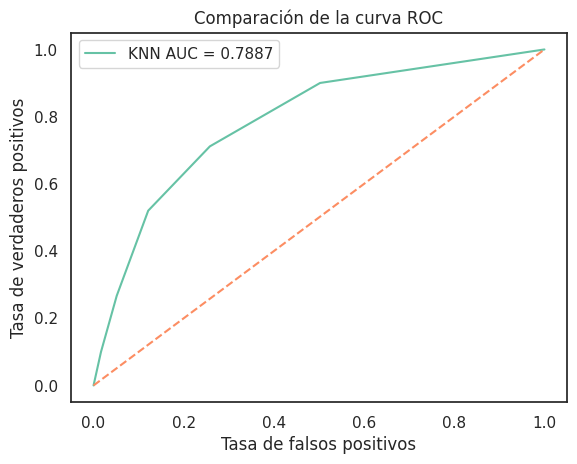

In [156]:
#ROC Curve y AUC

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)

auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"KNN AUC = {auc_knn:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Comparación de la curva ROC")
plt.legend()
plt.show()


**# Guardado de modelos entrenados**

In [157]:
import joblib  # Libreria que nos permite guardar el modelo


# Guardar el modelo de KNN
joblib.dump(knn, "Modelo_knn.pkl")

# Guardar el scaler
joblib.dump(scaler, "Scaler_knn.pkl")

print(" Se guardaron los modelos y scaler correctamente.")



 Se guardaron los modelos y scaler correctamente.


In [158]:
# Descargar archivos  del modelo  que van en el backend
from google.colab import files

# Descargar cada archivo
files.download("Modelo_knn.pkl")
files.download("Scaler_knn.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusión.**

El algoritmo KNN proporcionó una perspectiva basada en instancias, lo que significa que no construye un modelo matemático previo, sino que utiliza directamente los datos de entrenamiento y toma decisiones calculando distancias entre el nuevo dato y sus vecinos más cercanos.

 **Puntos clave del modelo KNN**

1.	Modelo no lineal: Se captan relaciones complejas entre variables que modelos lineales podrían no detectar, especialmente tras un correcto escalado de los datos.

2.	Dependencia del preprocesamiento: Se requiere la normalización estricta y optimización del hiperparámetro K para obtener resultados estables y el evitar sobreajuste.

3.	Clasificación basada en similitud real: Su lógica se basa en distancia(vecinos) permitiendo identificar los clientes similares en su comportamiento, lo que facilita estrategias basadas en perfiles cercanos.

Mediante la selección óptima del parámetro k, el modelo logró clasificar clientes nuevos basándose en los patrones presentes en sus vecinos más cercanos. KNN ofrece una aproximación flexible que es capaz de capturar estructuras no lineales y separaciones naturales en el conjunto de datos.
